# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a    0.246695
b   -1.414651
c   -0.862195
d    1.599320
e   -2.096478
dtype: float64
a         NaN
b   -2.829301
c   -1.724391
d    3.198639
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas as a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2020,11,9,14,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 9 2020'
# or alternatively
date = '9/11/2020 14:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2020-11-10
2020-11-09 14:45:10.000015
9/11/2020 14:45:00
DatetimeIndex(['2020-09-11 14:45:00', '2020-09-12 14:45:00',
               '2020-09-13 14:45:00', '2020-09-14 14:45:00',
               '2020-09-15 14:45:00', '2020-09-16 14:45:00',
               '2020-09-17 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2020-09-11 14:45:00', '2020-09-11 14:45:01',
               '2020-09-11 14:45:02', '2020-09-11 14:45:03',
               '2020-09-11 14:45:04', '2020-09-11 14:45:05',
               '2020-09-11 14:45:06', '2020-09-11 14:45:07',
               '2020-09-11 14:45:08', '2020-09-11 14:45:09',
               ...
               '2020-09-11 15:44:50', '2020-09-11 15:44:51',
               '2020-09-11 15:44:52', '2020-09-11 15:44:53',
               '2020-09-11 15:44:54', '2020-09-11 15:44:55',
               '2020-09-11 15:44:56', '2020-09-11 15:44:57',
               '2020-09-11 15:44:58', '2020-09-11 15:44:59'],
              dtype='datetime64[ns]', lengt

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [7]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2010-11-12 00:00:00
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [8]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2020-11-9':'2020-11-11'], '\n') # Note - includes end time


2020-09-11 14:45:00    9.228103
2020-09-12 14:45:00    7.116688
2020-09-13 14:45:00    9.845277
2020-09-14 14:45:00    9.525999
Freq: D, dtype: float64 

Series([], Freq: D, dtype: float64) 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [10]:
entries=10
dates=pd.date_range('11/9/2020 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2020-11-09 14:45:00,1.657522,1.687230,1.433298,0.367413
2020-11-09 15:45:00,1.147594,-1.792579,-0.641154,0.195052
2020-11-09 16:45:00,0.099303,0.083171,-0.759927,-0.686712
2020-11-09 17:45:00,-1.817594,-0.517051,0.225200,0.545649
2020-11-09 18:45:00,0.587163,1.163684,0.728467,-0.276079
2020-11-09 19:45:00,0.050453,-2.396366,0.525185,-1.210820
2020-11-09 20:45:00,2.707623,-0.274019,0.302656,-0.886717
2020-11-09 21:45:00,0.798427,-0.111166,-0.167028,0.773953
2020-11-09 22:45:00,-1.045539,1.571761,0.854707,1.322690
2020-11-09 23:45:00,0.016279,1.144309,0.257062,0.914025


or by means of a dictionary:


In [11]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [12]:
df.head()

,A,B,C,D
2020-11-09 14:45:00,1.657522,1.687230,1.433298,0.367413
2020-11-09 15:45:00,1.147594,-1.792579,-0.641154,0.195052
2020-11-09 16:45:00,0.099303,0.083171,-0.759927,-0.686712
2020-11-09 17:45:00,-1.817594,-0.517051,0.225200,0.545649
2020-11-09 18:45:00,0.587163,1.163684,0.728467,-0.276079


In [13]:
df.tail(4)

,A,B,C,D
2020-11-09 20:45:00,2.707623,-0.274019,0.302656,-0.886717
2020-11-09 21:45:00,0.798427,-0.111166,-0.167028,0.773953
2020-11-09 22:45:00,-1.045539,1.571761,0.854707,1.322690
2020-11-09 23:45:00,0.016279,1.144309,0.257062,0.914025


In [14]:
df.index

DatetimeIndex(['2020-11-09 14:45:00', '2020-11-09 15:45:00',
               '2020-11-09 16:45:00', '2020-11-09 17:45:00',
               '2020-11-09 18:45:00', '2020-11-09 19:45:00',
               '2020-11-09 20:45:00', '2020-11-09 21:45:00',
               '2020-11-09 22:45:00', '2020-11-09 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values

array([[ 1.65752215,  1.68723002,  1.43329766,  0.367413  ],
       [ 1.14759383, -1.79257881, -0.64115428,  0.19505182],
       [ 0.09930301,  0.0831709 , -0.75992723, -0.68671216],
       [-1.81759357, -0.51705147,  0.22520015,  0.54564946],
       [ 0.58716289,  1.16368384,  0.72846693, -0.2760785 ],
       [ 0.05045264, -2.39636577,  0.52518482, -1.21081997],
       [ 2.7076232 , -0.27401882,  0.30265625, -0.88671674],
       [ 0.79842711, -0.1111655 , -0.16702825,  0.77395286],
       [-1.04553936,  1.57176076,  0.85470719,  1.32268976],
       [ 0.016279  ,  1.14430914,  0.25706226,  0.91402522]])

In [17]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.420123,0.055897,0.275847,0.105845
std,1.291952,1.385125,0.671259,0.839500
min,-1.817594,-2.396366,-0.759927,-1.210820
25%,0.024822,-0.456293,-0.068971,-0.584054
50%,0.343233,-0.013997,0.279859,0.281232
75%,1.060302,1.158840,0.677646,0.716877
max,2.707623,1.687230,1.433298,1.322690


In [18]:
df.T

,2020-11-09 14:45:00,2020-11-09 15:45:00,2020-11-09 16:45:00,2020-11-09 17:45:00,2020-11-09 18:45:00,2020-11-09 19:45:00,2020-11-09 20:45:00,2020-11-09 21:45:00,2020-11-09 22:45:00,2020-11-09 23:45:00
A,1.657522,1.147594,0.099303,-1.817594,0.587163,0.050453,2.707623,0.798427,-1.045539,0.016279
B,1.687230,-1.792579,0.083171,-0.517051,1.163684,-2.396366,-0.274019,-0.111166,1.571761,1.144309
C,1.433298,-0.641154,-0.759927,0.225200,0.728467,0.525185,0.302656,-0.167028,0.854707,0.257062
D,0.367413,0.195052,-0.686712,0.545649,-0.276079,-1.210820,-0.886717,0.773953,1.322690,0.914025


In [19]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2020-11-09 14:45:00,0.367413,1.433298,1.687230,1.657522
2020-11-09 15:45:00,0.195052,-0.641154,-1.792579,1.147594
2020-11-09 16:45:00,-0.686712,-0.759927,0.083171,0.099303
2020-11-09 17:45:00,0.545649,0.225200,-0.517051,-1.817594
2020-11-09 18:45:00,-0.276079,0.728467,1.163684,0.587163
2020-11-09 19:45:00,-1.210820,0.525185,-2.396366,0.050453
2020-11-09 20:45:00,-0.886717,0.302656,-0.274019,2.707623
2020-11-09 21:45:00,0.773953,-0.167028,-0.111166,0.798427
2020-11-09 22:45:00,1.322690,0.854707,1.571761,-1.045539
2020-11-09 23:45:00,0.914025,0.257062,1.144309,0.016279


In [20]:
df.sort_values(by="C")

,A,B,C,D
2020-11-09 16:45:00,0.099303,0.083171,-0.759927,-0.686712
2020-11-09 15:45:00,1.147594,-1.792579,-0.641154,0.195052
2020-11-09 21:45:00,0.798427,-0.111166,-0.167028,0.773953
2020-11-09 17:45:00,-1.817594,-0.517051,0.225200,0.545649
2020-11-09 23:45:00,0.016279,1.144309,0.257062,0.914025
2020-11-09 20:45:00,2.707623,-0.274019,0.302656,-0.886717
2020-11-09 19:45:00,0.050453,-2.396366,0.525185,-1.210820
2020-11-09 18:45:00,0.587163,1.163684,0.728467,-0.276079
2020-11-09 22:45:00,-1.045539,1.571761,0.854707,1.322690
2020-11-09 14:45:00,1.657522,1.687230,1.433298,0.367413


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [21]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2020-11-09 14:45:00    1.657522
2020-11-09 15:45:00    1.147594
2020-11-09 16:45:00    0.099303
2020-11-09 17:45:00   -1.817594
2020-11-09 18:45:00    0.587163
2020-11-09 19:45:00    0.050453
2020-11-09 20:45:00    2.707623
2020-11-09 21:45:00    0.798427
2020-11-09 22:45:00   -1.045539
2020-11-09 23:45:00    0.016279
Freq: H, Name: A, dtype: float64 

2020-11-09 14:45:00    1.657522
2020-11-09 15:45:00    1.147594
2020-11-09 16:45:00    0.099303
2020-11-09 17:45:00   -1.817594
2020-11-09 18:45:00    0.587163
2020-11-09 19:45:00    0.050453
2020-11-09 20:45:00    2.707623
2020-11-09 21:45:00    0.798427
2020-11-09 22:45:00   -1.045539
2020-11-09 23:45:00    0.016279
Freq: H, Name: A, dtype: float64


In [22]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2020-11-09 14:45:00":"2020-11-09 16:45:00"])

                            A         B         C         D
2020-11-09 14:45:00  1.657522  1.687230  1.433298  0.367413
2020-11-09 15:45:00  1.147594 -1.792579 -0.641154  0.195052
2020-11-09 16:45:00  0.099303  0.083171 -0.759927 -0.686712
                            A         B         C         D
2020-11-09 14:45:00  1.657522  1.687230  1.433298  0.367413
2020-11-09 15:45:00  1.147594 -1.792579 -0.641154  0.195052
2020-11-09 16:45:00  0.099303  0.083171 -0.759927 -0.686712


### Selection by label

In [23]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A    1.657522
B    1.687230
C    1.433298
D    0.367413
Name: 2020-11-09 14:45:00, dtype: float64

In [24]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]

,A,B
2020-11-09 14:45:00,1.657522,1.687230
2020-11-09 15:45:00,1.147594,-1.792579
2020-11-09 16:45:00,0.099303,0.083171
2020-11-09 17:45:00,-1.817594,-0.517051
2020-11-09 18:45:00,0.587163,1.163684
2020-11-09 19:45:00,0.050453,-2.396366
2020-11-09 20:45:00,2.707623,-0.274019
2020-11-09 21:45:00,0.798427,-0.111166
2020-11-09 22:45:00,-1.045539,1.571761
2020-11-09 23:45:00,0.016279,1.144309


In [25]:
# showing label slicing, both endpoints are included:
df.loc['2020-11-09 18:45:00':'2020-11-09 20:45:00',['A','B']]

,A,B
2020-11-09 18:45:00,0.587163,1.163684
2020-11-09 19:45:00,0.050453,-2.396366
2020-11-09 20:45:00,2.707623,-0.274019


In [26]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

1.1475938292953716
1.1475938292953716


### Selecting by position

In [27]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A   -1.817594
B   -0.517051
C    0.225200
D    0.545649
Name: 2020-11-09 17:45:00, dtype: float64 

                            A         B
2020-11-09 17:45:00 -1.817594 -0.517051
2020-11-09 18:45:00  0.587163  1.163684


In [28]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2020-11-09 15:45:00,1.147594,-0.641154
2020-11-09 16:45:00,0.099303,-0.759927
2020-11-09 18:45:00,0.587163,0.728467


In [29]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2020-11-09 15:45:00  1.147594 -1.792579 -0.641154  0.195052
2020-11-09 16:45:00  0.099303  0.083171 -0.759927 -0.686712 

                            B         C
2020-11-09 14:45:00  1.687230  1.433298
2020-11-09 15:45:00 -1.792579 -0.641154
2020-11-09 16:45:00  0.083171 -0.759927
2020-11-09 17:45:00 -0.517051  0.225200
2020-11-09 18:45:00  1.163684  0.728467
2020-11-09 19:45:00 -2.396366  0.525185
2020-11-09 20:45:00 -0.274019  0.302656
2020-11-09 21:45:00 -0.111166 -0.167028
2020-11-09 22:45:00  1.571761  0.854707
2020-11-09 23:45:00  1.144309  0.257062


In [30]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


-1.7925788104564988

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [31]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2020-11-09 14:45:00,1.657522,1.687230,1.433298,0.367413
2020-11-09 16:45:00,0.099303,0.083171,-0.759927,-0.686712
2020-11-09 18:45:00,0.587163,1.163684,0.728467,-0.276079
2020-11-09 22:45:00,-1.045539,1.571761,0.854707,1.322690
2020-11-09 23:45:00,0.016279,1.144309,0.257062,0.914025


In [32]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2020-11-09 14:45:00,1.657522,1.687230,1.433298,0.367413
2020-11-09 15:45:00,1.147594,NaN,NaN,0.195052
2020-11-09 16:45:00,0.099303,0.083171,NaN,NaN
2020-11-09 17:45:00,NaN,NaN,0.225200,0.545649
2020-11-09 18:45:00,0.587163,1.163684,0.728467,NaN
2020-11-09 19:45:00,0.050453,NaN,0.525185,NaN
2020-11-09 20:45:00,2.707623,NaN,0.302656,NaN
2020-11-09 21:45:00,0.798427,NaN,NaN,0.773953
2020-11-09 22:45:00,NaN,1.571761,0.854707,1.322690
2020-11-09 23:45:00,0.016279,1.144309,0.257062,0.914025


### Setting

Combination of selection and setting of values

In [33]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [34]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,1.687230,1.433298,5,0.0,0,1.000000
2020-11-09 15:45:00,1.147594,-1.792579,-0.641154,5,0.5,2,0.999962
2020-11-09 16:45:00,0.099303,0.083171,-0.759927,5,1.0,4,0.999848
2020-11-09 17:45:00,-1.817594,-0.517051,0.225200,5,1.5,6,0.999657
2020-11-09 18:45:00,0.587163,1.163684,0.728467,5,2.0,8,0.999391
2020-11-09 19:45:00,0.050453,-2.396366,0.525185,5,2.5,10,0.999048
2020-11-09 20:45:00,2.707623,-0.274019,0.302656,5,3.0,12,0.998630
2020-11-09 21:45:00,0.798427,-0.111166,-0.167028,5,3.5,14,0.998135
2020-11-09 22:45:00,-1.045539,1.571761,0.854707,5,4.0,16,0.997564
2020-11-09 23:45:00,0.016279,1.144309,0.257062,5,4.5,18,0.996917


In [35]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,-1.687230,-1.433298,-5,0.0,0,-1.000000
2020-11-09 15:45:00,-1.147594,-1.792579,-0.641154,-5,-0.5,-2,-0.999962
2020-11-09 16:45:00,-0.099303,-0.083171,-0.759927,-5,-1.0,-4,-0.999848
2020-11-09 17:45:00,-1.817594,-0.517051,-0.225200,-5,-1.5,-6,-0.999657
2020-11-09 18:45:00,-0.587163,-1.163684,-0.728467,-5,-2.0,-8,-0.999391
2020-11-09 19:45:00,-0.050453,-2.396366,-0.525185,-5,-2.5,-10,-0.999048
2020-11-09 20:45:00,-2.707623,-0.274019,-0.302656,-5,-3.0,-12,-0.998630
2020-11-09 21:45:00,-0.798427,-0.111166,-0.167028,-5,-3.5,-14,-0.998135
2020-11-09 22:45:00,-1.045539,-1.571761,-0.854707,-5,-4.0,-16,-0.997564
2020-11-09 23:45:00,-0.016279,-1.144309,-0.257062,-5,-4.5,-18,-0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [36]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
df.drop(columns=['E prime'])

,A,B,C,D,E,cosine
2020-11-09 14:45:00,0.000000,1.687230,1.433298,5,0.0,1.000000
2020-11-09 15:45:00,1.147594,-1.792579,-0.641154,5,0.5,0.999962
2020-11-09 16:45:00,0.099303,0.083171,-0.759927,5,1.0,0.999848
2020-11-09 17:45:00,-1.817594,-0.517051,0.225200,5,1.5,0.999657
2020-11-09 18:45:00,0.587163,1.163684,0.728467,5,2.0,0.999391
2020-11-09 19:45:00,0.050453,-2.396366,0.525185,5,2.5,0.999048
2020-11-09 20:45:00,2.707623,-0.274019,0.302656,5,3.0,0.998630
2020-11-09 21:45:00,0.798427,-0.111166,-0.167028,5,3.5,0.998135
2020-11-09 22:45:00,-1.045539,1.571761,0.854707,5,4.0,0.997564
2020-11-09 23:45:00,0.016279,1.144309,0.257062,5,4.5,0.996917


In [37]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,1.687230,1.433298,5,0.0,0,1.000000
2020-11-09 19:45:00,0.050453,-2.396366,0.525185,5,2.5,10,0.999048
2020-11-09 20:45:00,2.707623,-0.274019,0.302656,5,3.0,12,0.998630
2020-11-09 21:45:00,0.798427,-0.111166,-0.167028,5,3.5,14,0.998135
2020-11-09 22:45:00,-1.045539,1.571761,0.854707,5,4.0,16,0.997564
2020-11-09 23:45:00,0.016279,1.144309,0.257062,5,4.5,18,0.996917


In [38]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2020-11-09 22:45:00"))

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,1.687230,1.433298,5,0.0,0,1.000000
2020-11-09 15:45:00,1.147594,-1.792579,-0.641154,5,0.5,2,0.999962
2020-11-09 16:45:00,0.099303,0.083171,-0.759927,5,1.0,4,0.999848
2020-11-09 17:45:00,-1.817594,-0.517051,0.225200,5,1.5,6,0.999657
2020-11-09 18:45:00,0.587163,1.163684,0.728467,5,2.0,8,0.999391
2020-11-09 19:45:00,0.050453,-2.396366,0.525185,5,2.5,10,0.999048
2020-11-09 20:45:00,2.707623,-0.274019,0.302656,5,3.0,12,0.998630
2020-11-09 21:45:00,0.798427,-0.111166,-0.167028,5,3.5,14,0.998135
2020-11-09 23:45:00,0.016279,1.144309,0.257062,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [39]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,NaN,1.687230,1.433298,5,NaN,NaN,1.000000
2020-11-09 15:45:00,1.147594,NaN,NaN,5,0.5,2.0,0.999962
2020-11-09 16:45:00,0.099303,0.083171,NaN,5,1.0,4.0,0.999848
2020-11-09 17:45:00,NaN,NaN,0.225200,5,1.5,6.0,0.999657
2020-11-09 18:45:00,0.587163,1.163684,0.728467,5,2.0,8.0,0.999391
2020-11-09 19:45:00,0.050453,NaN,0.525185,5,2.5,10.0,0.999048
2020-11-09 20:45:00,2.707623,NaN,0.302656,5,3.0,12.0,0.998630
2020-11-09 21:45:00,0.798427,NaN,NaN,5,3.5,14.0,0.998135
2020-11-09 22:45:00,NaN,1.571761,0.854707,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.016279,1.144309,0.257062,5,4.5,18.0,0.996917


In [40]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2020-11-09 18:45:00,0.587163,1.163684,0.728467,5,2.0,8.0,0.999391
2020-11-09 23:45:00,0.016279,1.144309,0.257062,5,4.5,18.0,0.996917


In [41]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,True,False,False,False,True,True,False
2020-11-09 15:45:00,False,True,True,False,False,False,False
2020-11-09 16:45:00,False,False,True,False,False,False,False
2020-11-09 17:45:00,True,True,False,False,False,False,False
2020-11-09 18:45:00,False,False,False,False,False,False,False
2020-11-09 19:45:00,False,True,False,False,False,False,False
2020-11-09 20:45:00,False,True,False,False,False,False,False
2020-11-09 21:45:00,False,True,True,False,False,False,False
2020-11-09 22:45:00,True,False,False,False,False,False,False
2020-11-09 23:45:00,False,False,False,False,False,False,False


In [42]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,1.687230,1.433298,5,0.0,0.0,1.000000
2020-11-09 15:45:00,1.147594,0.000000,0.000000,5,0.5,2.0,0.999962
2020-11-09 16:45:00,0.099303,0.083171,0.000000,5,1.0,4.0,0.999848
2020-11-09 17:45:00,0.000000,0.000000,0.225200,5,1.5,6.0,0.999657
2020-11-09 18:45:00,0.587163,1.163684,0.728467,5,2.0,8.0,0.999391
2020-11-09 19:45:00,0.050453,0.000000,0.525185,5,2.5,10.0,0.999048
2020-11-09 20:45:00,2.707623,0.000000,0.302656,5,3.0,12.0,0.998630
2020-11-09 21:45:00,0.798427,0.000000,0.000000,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.000000,1.571761,0.854707,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.016279,1.144309,0.257062,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [43]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,NaN,1.687230,1.433298,5,NaN,NaN,1.000000
2020-11-09 15:45:00,1.147594,1.687230,1.433298,5,0.5,2.0,0.999962
2020-11-09 16:45:00,0.099303,0.083171,1.433298,5,1.0,4.0,0.999848
2020-11-09 17:45:00,0.099303,0.083171,0.225200,5,1.5,6.0,0.999657
2020-11-09 18:45:00,0.587163,1.163684,0.728467,5,2.0,8.0,0.999391
2020-11-09 19:45:00,0.050453,1.163684,0.525185,5,2.5,10.0,0.999048
2020-11-09 20:45:00,2.707623,1.163684,0.302656,5,3.0,12.0,0.998630
2020-11-09 21:45:00,0.798427,1.163684,0.302656,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.798427,1.571761,0.854707,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.016279,1.144309,0.257062,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [44]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          0.254371
B          0.055897
C          0.275847
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2020-11-09 14:45:00    1.302933
2020-11-09 15:45:00    1.030546
2020-11-09 16:45:00    1.488913
2020-11-09 17:45:00    1.627173
2020-11-09 18:45:00    2.639815
2020-11-09 19:45:00    2.382617
2020-11-09 20:45:00    3.390699
2020-11-09 21:45:00    3.431195
2020-11-09 22:45:00    3.911213
2020-11-09 23:45:00    4.273510
Freq: H, dtype: float64 



In [45]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,1.687230,1.433298,5,0.0,0,1.000000
2020-11-09 15:45:00,1.147594,-0.105349,0.792143,10,0.5,2,1.999962
2020-11-09 16:45:00,1.246897,-0.022178,0.032216,15,1.5,6,2.999810
2020-11-09 17:45:00,-0.570697,-0.539229,0.257416,20,3.0,12,3.999467
2020-11-09 18:45:00,0.016466,0.624454,0.985883,25,5.0,20,4.998858
2020-11-09 19:45:00,0.066919,-1.771911,1.511068,30,7.5,30,5.997906
2020-11-09 20:45:00,2.774542,-2.045930,1.813724,35,10.5,42,6.996536
2020-11-09 21:45:00,3.572969,-2.157096,1.646696,40,14.0,56,7.994670
2020-11-09 22:45:00,2.527430,-0.585335,2.501403,45,18.0,72,8.992234
2020-11-09 23:45:00,2.543709,0.558974,2.758466,50,22.5,90,9.989152


In [46]:
df

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,1.687230,1.433298,5,0.0,0,1.000000
2020-11-09 15:45:00,1.147594,-1.792579,-0.641154,5,0.5,2,0.999962
2020-11-09 16:45:00,0.099303,0.083171,-0.759927,5,1.0,4,0.999848
2020-11-09 17:45:00,-1.817594,-0.517051,0.225200,5,1.5,6,0.999657
2020-11-09 18:45:00,0.587163,1.163684,0.728467,5,2.0,8,0.999391
2020-11-09 19:45:00,0.050453,-2.396366,0.525185,5,2.5,10,0.999048
2020-11-09 20:45:00,2.707623,-0.274019,0.302656,5,3.0,12,0.998630
2020-11-09 21:45:00,0.798427,-0.111166,-0.167028,5,3.5,14,0.998135
2020-11-09 22:45:00,-1.045539,1.571761,0.854707,5,4.0,16,0.997564
2020-11-09 23:45:00,0.016279,1.144309,0.257062,5,4.5,18,0.996917


In [47]:
df.apply(lambda x: x.max() - x.min())

A           4.525217
B           4.083596
C           2.193225
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [48]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2020-11-09 14:45:00    1.687230
2020-11-09 15:45:00   -0.644985
2020-11-09 16:45:00    0.182474
2020-11-09 17:45:00   -2.334645
2020-11-09 18:45:00    1.750847
2020-11-09 19:45:00   -2.345913
2020-11-09 20:45:00    2.433604
2020-11-09 21:45:00    0.687262
2020-11-09 22:45:00    0.526221
2020-11-09 23:45:00    1.160588
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [49]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
!rm -r ~/data
data

--2020-11-10 15:24:00--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Risoluzione di www.dropbox.com (www.dropbox.com)... 2620:100:6025:1::a27d:4501, 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|2620:100:6025:1::a27d:4501|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/xvjzaxzz3ysphme/data_000637.txt [segue]
--2020-11-10 15:24:00--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Riutilizzo della connessione esistente a [www.dropbox.com]:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucfdd226d66efde2398815e7430a.dl.dropboxusercontent.com/cd/0/inline/BC43DJ1kmarGJKr8G_joqhGtTl8mTv71xSkHmCy0KeHfATExezqUWvtQ9fEwUtiYYF-1AyYoTc8vH6iXinkWMK4ckO05ttcRpZUDCuppap9-ClvYGQ5vmr_aoTTVXNKvZXA/file# [segue]
--2020-11-10 15:24:01--  https://ucfdd226d66efde2398815e7430a.dl.dropboxusercontent.com/cd/0/inline/BC43DJ1kmarGJKr8G_joqhGtTl8mTv71xSkHmCy0KeHfATExezqUWvtQ9fEw

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [50]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [51]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [52]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,1.115685,-2.251500,1.128091,0.749283
1,-0.396055,-0.528731,1.029501,-0.185368
2,-0.585025,-1.387023,-0.075343,-0.383441
3,-1.805879,-1.995292,1.298606,1.258833
4,0.700499,-0.535735,-0.716590,0.437984
5,0.454469,-0.282098,-1.999576,1.553026
6,0.117558,0.262596,-0.668956,-1.079356
7,-1.832060,0.460445,0.883268,-0.748769
8,0.983574,-2.014786,1.202338,0.056089
9,-0.711792,1.191483,-1.657583,-1.183459


In [53]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  1.115685 -2.251500  1.128091  0.749283
 1 -0.396055 -0.528731  1.029501 -0.185368
 2 -0.585025 -1.387023 -0.075343 -0.383441,
           0         1         2         3
 3 -1.805879 -1.995292  1.298606  1.258833
 4  0.700499 -0.535735 -0.716590  0.437984
 5  0.454469 -0.282098 -1.999576  1.553026
 6  0.117558  0.262596 -0.668956 -1.079356,
           0         1         2         3
 7 -1.832060  0.460445  0.883268 -0.748769
 8  0.983574 -2.014786  1.202338  0.056089
 9 -0.711792  1.191483 -1.657583 -1.183459]

In [54]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,1.115685,-2.251500,1.128091,0.749283
1,-0.396055,-0.528731,1.029501,-0.185368
2,-0.585025,-1.387023,-0.075343,-0.383441
3,-1.805879,-1.995292,1.298606,1.258833
4,0.700499,-0.535735,-0.716590,0.437984
5,0.454469,-0.282098,-1.999576,1.553026
6,0.117558,0.262596,-0.668956,-1.079356
7,-1.832060,0.460445,0.883268,-0.748769
8,0.983574,-2.014786,1.202338,0.056089
9,-0.711792,1.191483,-1.657583,-1.183459


In [55]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

,0,1,2,3
0,1.115685,-2.251500,1.128091,0.749283
1,-0.396055,-0.528731,1.029501,-0.185368
2,-0.585025,-1.387023,-0.075343,-0.383441
3,-1.805879,-1.995292,1.298606,1.258833
4,0.700499,-0.535735,-0.716590,0.437984
5,0.454469,-0.282098,-1.999576,1.553026
6,0.117558,0.262596,-0.668956,-1.079356
7,-1.832060,0.460445,0.883268,-0.748769
8,0.983574,-2.014786,1.202338,0.056089
9,-0.711792,1.191483,-1.657583,-1.183459


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [56]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [57]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,1.241546,1.611719
1,bar,one,0.791064,0.578885
2,foo,two,0.271375,0.991872
3,bar,three,-0.180617,-0.764473
4,foo,two,-0.947180,0.220167
5,bar,two,1.819605,0.382813
6,foo,one,1.074162,0.039759
7,foo,three,-0.498364,-1.514484


In [58]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,2.430052,0.197225
foo,1.141539,1.349033


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [59]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one       0.647990
       two      -0.140436
baz    one       0.321310
       two       0.559452
foo    one      -0.053878
       two      -0.375017
qux    one       1.396785
       two       0.914039
dtype: float64


In [60]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.791064  0.578885
    three -0.180617 -0.764473
    two    1.819605  0.382813
foo one    2.315708  1.651478
    three -0.498364 -1.514484
    two   -0.675805  1.212039

In [61]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C    0.791064
            D    0.578885
     three  C   -0.180617
            D   -0.764473
     two    C    1.819605
            D    0.382813
foo  one    C    2.315708
            D    1.651478
     three  C   -0.498364
            D   -1.514484
     two    C   -0.675805
            D    1.212039
dtype: float64

## Plotting

Just a preview, more on the next lab class!

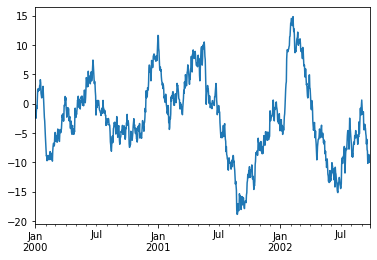

In [62]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

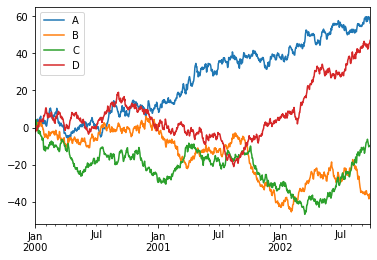

In [63]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')